# Setting up facial recognition software

This first section is just to connect to Google Drive in order to read the correct CSV data. It will ask you to click on a link, where you will sign in to your Google account. It will then present a big and ugly *but has a great personality* verification code which you should then copy into the box that says "Enter verification code" and hit enter.

In [0]:
# Import the libraries needed in order to read data from Google Drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Now we import the libraries that we will be using.

In [0]:
# Importing the libraries we are using
import pandas as pd
import numpy as np
import cv2

Next we fetch the data and store a variable for the file name.

In [0]:
# This section here is needed in order to read the data from Google Drive
id = '1Dq3_KXaOJFhahN5uleX5K7H2MgYCbCc_'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fer2013.csv')

# Setting a variable to the name of the file we're retrieving the data from
data_file_name = 'fer2013.csv'

Now we will preprocess the data!

In [7]:
# Write the code to preprocess the data here
data = pd.read_csv(data_file_name)
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
emotions = ["angry", "digust", "scared", "happy", "sad", "surprised", "neutral"]
num_emotions = data['emotion'].value_counts()
num_emotions.rename(lambda x: emotions[x])

happy        8989
neutral      6198
sad          6077
scared       5121
angry        4953
surprised    4002
digust        547
Name: emotion, dtype: int64

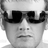

In [28]:
pixels = data['pixels'][9999]
pixel_array = [int(pixel) for pixel in pixels.split(' ')]
#pixel_array
pixel_matrix = np.asarray(pixel_array).reshape(48, 48)
from google.colab.patches import cv2_imshow
cv2_imshow(pixel_matrix)

In [0]:
def load_data(file_name):
  data = pd.read_csv(file_name)
  pixels = data['pixels'].tolist()
  width, height = 48, 48
  faces = []
  for pixel_sequence in pixels:
    pixel_array = [int(pixel) for pixel in pixel_sequence.split(' ')]
    pixel_matrix = np.asarray(pixel_array).reshape(width, height)
    face = cv2.resize(pixel_matrix.astype('uint8'), (width,height))
    faces.append(face.astype('float32'))
    #moxing to every shape of pixel values